# Kickstart Data Science Workshop
Workshops in our Kickstart series are tailored to casual programmers and non-programmers that are taking their first steps into data science. It assumes no prior knowledge or academic background, and attendees will be introduced to the beautiful art of writing R / Python code to produce data visualization and simple mahine learning models.

## Prototype

In [84]:
import sqlite3
import pandas as pd
import altair as alt

print(pd.__version__)

0.24.2


For context on the dataset we're working with, refer to: 
- A screenshot of the [the survey form](https://github.com/onlyphantom/pedagogy/issues/6) 
- Refer to the feature set on [the actual app](https://github.com/onlyphantom/pedagogy)

In [119]:
conn = sqlite3.connect('data_input/infratools.db')
df = pd.read_sql_query('SELECT r.knowledge, \
                        r.venue_score, r.satisfaction_score, \
                        w.class_size, w.workshop_instructor \
                        FROM response as r \
                        LEFT JOIN workshop as w \
                        ON r.workshop_id = w.id', conn)
df.tail()

,knowledge,venue_score,satisfaction_score,class_size,workshop_instructor
2064,5.0,5.0,5.0,25,12
2065,5.0,4.0,3.0,25,12
2066,5.0,5.0,4.0,25,12
2067,5.0,3.0,5.0,25,12
2068,4.0,5.0,4.0,25,12


In [120]:
top5 = df.workshop_instructor.value_counts().head()
top5

1    693
2    225
8    152
5    150
3    134
Name: workshop_instructor, dtype: int64

In [121]:
selected = df.loc[df.workshop_instructor.isin(list(top5.axes[0])), ].copy()
# selected.tail()
selected.shape

(1354, 5)

In [122]:
selected.head()

,knowledge,venue_score,satisfaction_score,class_size,workshop_instructor
0,4.0,4.0,4.0,21,1
1,5.0,5.0,5.0,21,1
2,5.0,4.0,5.0,21,1
3,5.0,3.0,4.0,21,1
4,5.0,4.0,4.0,21,1


In [123]:
selected.dropna(inplace=True)
selected.shape

(1246, 5)

In [124]:
selected.groupby('workshop_instructor').mean().reset_index()

,workshop_instructor,knowledge,venue_score,satisfaction_score,class_size
0,1,4.692675,4.202229,4.243631,26.538217
1,2,4.441441,4.229730,4.216216,21.135135
2,3,4.417910,4.059701,4.007463,14.940299
3,5,4.247934,4.000000,3.991736,25.867769
4,8,4.560284,4.141844,4.262411,20.078014


In [125]:
melted = selected.groupby('workshop_instructor').mean().reset_index().melt(
    'workshop_instructor', var_name='measurement', value_name='value'
)
melted.tail()

,workshop_instructor,measurement,value
15,1,class_size,26.538217
16,2,class_size,21.135135
17,3,class_size,14.940299
18,5,class_size,25.867769
19,8,class_size,20.078014


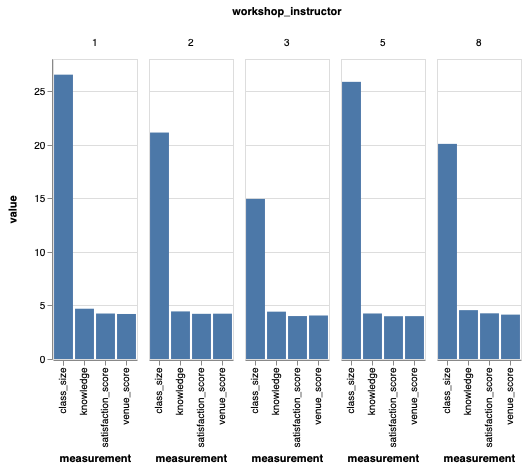

In [127]:
alt.Chart(melted).mark_bar().encode(
    x='measurement:N',
    y='value:Q',
    column='workshop_instructor'
)

In [128]:
melted.head()

,workshop_instructor,measurement,value
0,1,knowledge,4.692675
1,2,knowledge,4.441441
2,3,knowledge,4.417910
3,5,knowledge,4.247934
4,8,knowledge,4.560284


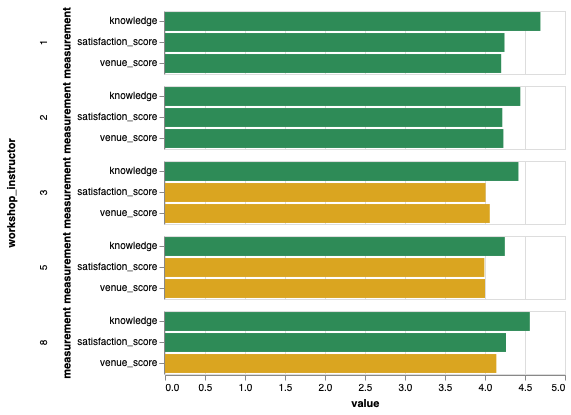

In [155]:
alt.Chart(melted.loc[melted.measurement != 'class_size', ]).mark_bar().encode(
    x='value:Q',
    y='measurement:N',
    row='workshop_instructor',
    color=alt.condition(
        alt.datum.value > 4.2,
        alt.value("seagreen"),
        alt.value("goldenrod")
    )
).interactive()

## Production 

Now that we have a _pretty_ polished, _interactive_ chart, we can take it to production. 

Shift your attention back to the workshop to see how we can now take the code we develop above, and integrate / incorporate it into a live app:

- Importing the necessary libraries
- Exposing the data through altair
- Setting an endpoint
- Visualize in the view layer
- Test!
- Deploy / Continious delivery

Check out the final app at [pedagogyapp.com](http://pedagogyapp.com)